In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [3]:
# 载入波士顿房价数据集
california_dataset = fetch_california_housing()

california_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
X = pd.DataFrame(california_dataset['data'], columns = california_dataset['feature_names'])
y = pd.DataFrame(california_dataset['target'], columns = california_dataset['target_names'])

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


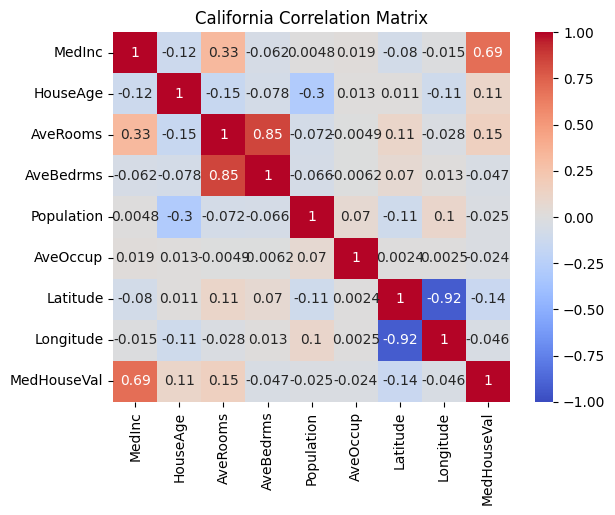

In [6]:
# 查看协方差矩阵
california_df = X.join(y)
corr_matrix = california_df.corr()

sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True, vmax = 1, vmin = -1)

plt.title('California Correlation Matrix')
plt.show()

<AxesSubplot:xlabel='MedInc', ylabel='MedHouseVal'>

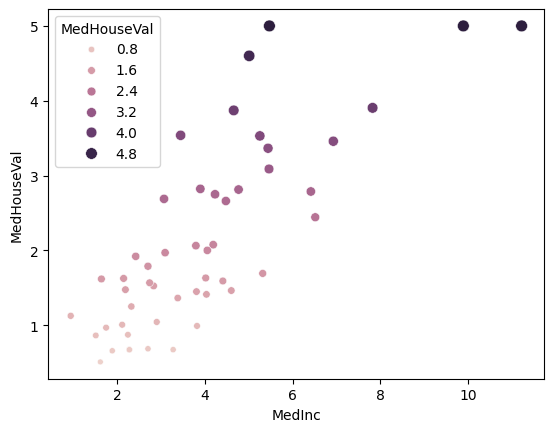

In [7]:
# 删除大部分数据，保留50个，只是为了方便观察
selected_cal_df = california_df.sample(n = 50, random_state = 2)

sns.scatterplot(data = selected_cal_df, x = 'MedInc', y = 'MedHouseVal', hue = 'MedHouseVal',
                size = 'MedHouseVal')

In [8]:
'''
训练KNN回归器模型
'''

X = selected_cal_df[['MedInc']]
y = selected_cal_df[['MedHouseVal']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

knn_reg = KNeighborsRegressor(n_neighbors = 1)

knn_reg.fit(X_train, y_train)

knn_reg.score(X_test, y_test)

0.3967999208982136

c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


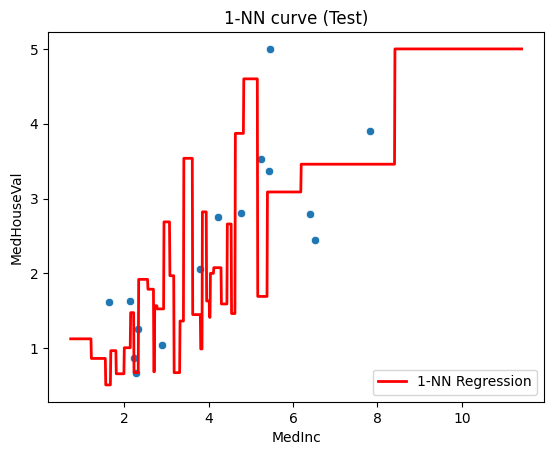

In [9]:
'''
绘制KNN回归器拟合曲线
'''

x_min, x_max = X_train['MedInc'].min() - 0.2, X_train['MedInc'].max() + 0.2

xx = np.arange(x_min, x_max, 0.01)

y_pred = knn_reg.predict(pd.DataFrame(xx))

sns.scatterplot(x = X_test['MedInc'], y = y_test['MedHouseVal'])

plt.plot(xx, y_pred, label = '1-NN Regression', color = 'red', linewidth = 2)

plt.title('1-NN curve (Test)')
plt.legend(loc = 'lower right')
plt.show()

c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


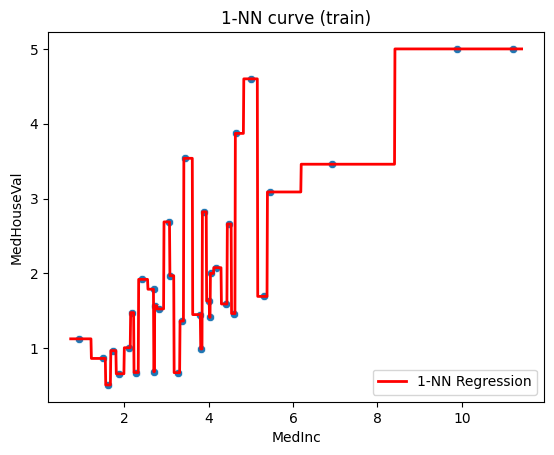

In [10]:
# 将绘制KNN拟合曲线的过程封装为函数

'''
此函数用于生成指定K的KNN拟合曲线

参数：
    X_train:    can only has one feature
    X_test:     can only has one feature
    y_train:    training target (连续变量)
    y_test:     test target (连续变量)
    k:          # of neighbors
    dataPoint_type:   string, can be 'train' or 'test', 决定显示训练集的还是测试集的数据点
'''
def plot_knn_curve2D(X_train, X_test, y_train, y_test, k, dataPoint_type):

    '''
    拟合模型
    '''
    # 创建KNN回归器
    knn_reg = KNeighborsRegressor(n_neighbors = k)

    # 拟合模型
    knn_reg.fit(X_train, y_train)

    '''
    绘制函数曲线
    '''
    # 得到x的范围
    x_min, x_max = X_train['MedInc'].min() - 0.2, X_train['MedInc'].max() + 0.2

    # 生成覆盖该范围的x的数列
    xx = np.arange(x_min, x_max, 0.01)

    # 对整个x的数列进行预测并保存结果
    y_pred = knn_reg.predict(pd.DataFrame(xx))

    if dataPoint_type == 'train':
        # 图中的点为训练集的数据点
        sns.scatterplot(x = X_train['MedInc'], y = y_train['MedHouseVal'])

    else:
        # 图中的点为测试集的数据点
        sns.scatterplot(x = X_test['MedInc'], y = y_test['MedHouseVal'])

    # 绘制模型拟合的函数曲线
    plt.plot(xx, y_pred, label = '{}-NN Regression'.format(k), color = 'red', linewidth = 2)

    # 设置图形属性
    plt.title('{}-NN curve ({})'.format(k, dataPoint_type))
    plt.legend(loc = 'lower right')
    plt.show()

plot_knn_curve2D(X_train, X_test, y_train, y_test, 1, 'train')

c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


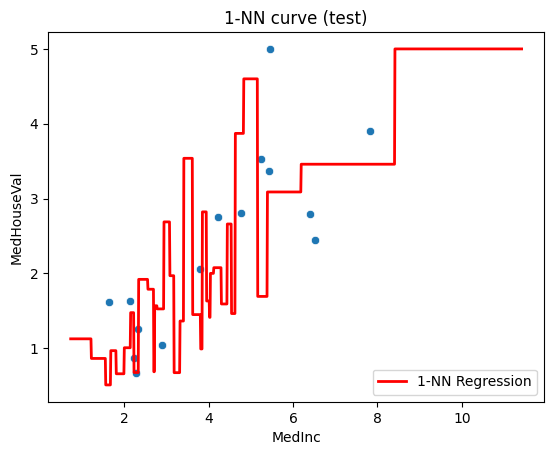

In [11]:
plot_knn_curve2D(X_train, X_test, y_train, y_test, 1, 'test')

c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


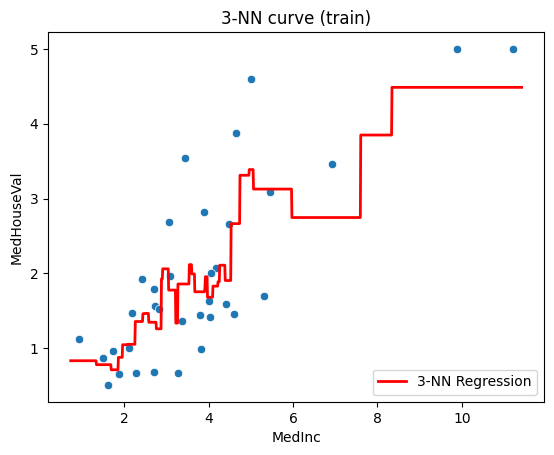

In [12]:
plot_knn_curve2D(X_train, X_test, y_train, y_test, 3, 'train')

c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


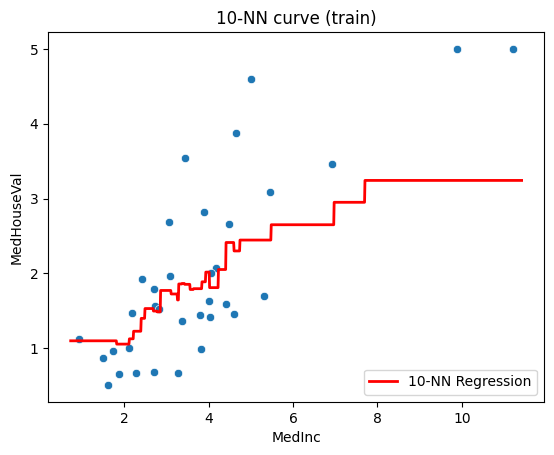

In [13]:
plot_knn_curve2D(X_train, X_test, y_train, y_test, 10, 'train')